#Retail Consumer Data Analysis

**Business Requirement**<br>

The objective of this analysis is to understand how consumer spending patterns fluctuate in response to changes in oil prices. Additionally, the analysis will take into account the influence of seasonal variations, holidays, and special events to provide a comprehensive view of consumer behavior. By identifying these key trends and correlations, businesses can make data-driven decisions to optimize pricing strategies, inventory management, and marketing efforts.



## **About DataCard**  
The dataset for this analysis has been sourced from Kaggle and consists of multiple files containing relevant information on consumer transactions, oil prices, store details, and holiday events. The key datasets include:  

- **`oil.csv`** – Contains historical oil prices for each transaction date.  
- **`store.csv`** – Provides details related to different stores, such as location and type.  
- **`transactions.csv`** – Records daily transaction data for each store, offering insights into consumer spending patterns.  
- **`holidays.csv`** – Lists holidays and special events that could impact consumer behavior and sales trends.  

By integrating these datasets, we can analyze how fluctuations in oil prices, along with seasonal events and holidays, influence retail consumer spending.

## **The Main Analysis is Divided into Three Key Tasks**  
To gain a deeper understanding of consumer spending behavior, the analysis has been structured into three focused tasks:  

1. **Understanding the Impact of Oil Prices**  
   - Analyzing how fluctuations in oil prices correlate with changes in consumer spending.  
2. **Seasonal and Event-Based Spending Patterns**  
   - Examining the influence of different seasons, holidays, and special events on retail transactions.  
3. **Store-Level Variations in Consumer Behavior**  
   - Investigating how spending patterns vary across different store locations and types.  

Each of these tasks includes detailed interpretations supported by visualizations and data-driven insights in the subsequent sections.

In [3]:
#import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [4]:
#fetch required files
holidays_events = pd.read_csv('holidays_events.csv')
oil = pd.read_csv('oil.csv')
stores = pd.read_csv('stores.csv')
transactions = pd.read_csv('transactions.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [5]:
#clean the data
holidays_events['date']=pd.to_datetime(holidays_events['date'])
transactions['date'] = pd.to_datetime(transactions['date'])
oil['date'] = pd.to_datetime(oil['date'])
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [6]:
#lets add some required columns to the train data
train_data = train.merge(holidays_events[['date','type','locale_name','transferred']], on='date', how='left')
train_data = train_data.merge(oil, on='date', how='left')
train_data = train_data.merge(stores[['store_nbr','city','state']], on='store_nbr', how='left')
train_data = train_data.merge(transactions[['date','store_nbr','transactions']], on=['date','store_nbr'], how='left')
train_data['day'] = train_data['date'].dt.day
train_data['month'] = train_data['date'].dt.month
train_data['year'] = train_data['date'].dt.year
train_data['season'] = ['winter' if 3 <= month <= 5 else 'spring' if 6 <= month <= 8 else 'summer' if 9 <= month <= 11 else 'winter' for month in train_data['month']]

In [7]:
train_data.head()

,id,date,store_nbr,family,sales,onpromotion,type,locale_name,transferred,dcoilwtico,city,state,transactions,day,month,year,season
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,Ecuador,False,NaN,Quito,Pichincha,NaN,1,1,2013,winter
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,Ecuador,False,NaN,Quito,Pichincha,NaN,1,1,2013,winter
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,Ecuador,False,NaN,Quito,Pichincha,NaN,1,1,2013,winter
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,Ecuador,False,NaN,Quito,Pichincha,NaN,1,1,2013,winter
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,Ecuador,False,NaN,Quito,Pichincha,NaN,1,1,2013,winter


## **Task 1: Sales Trend Analysis**  

### **Business Requirement:**  
The goal of this task is to evaluate overall sales performance by identifying key trends and patterns over time. This analysis will help in understanding consumer spending behavior and potential growth opportunities.  

### **Key Analysis Areas:**  
1. **Yearly Sales Trends**  
   - Examine sales performance over time to detect patterns of growth or decline.  
   - Identify long-term trends in consumer spending.  

2. **Seasonality Patterns in Sales**  
   - Analyze recurring sales patterns based on different seasons.  
   - Determine peak and off-peak sales periods.  

3. **Holiday Impact on Sales**  
   - Assess sales fluctuations before, during, and after major holidays and special events.  
   - Compare sales on regular days versus holiday periods to measure their influence.  

The insights gained from this analysis will help businesses optimize inventory planning, marketing strategies, and pricing decisions. Visualizations and data-driven interpretations will be provided in the upcoming sections.

In [8]:
yearly_sales = train_data.groupby('year')['sales'].sum()
yearly_sales

,sales
year,
2013,1.424880e+08
2014,2.130044e+08
2015,2.438321e+08
2016,2.991820e+08
2017,1.980683e+08


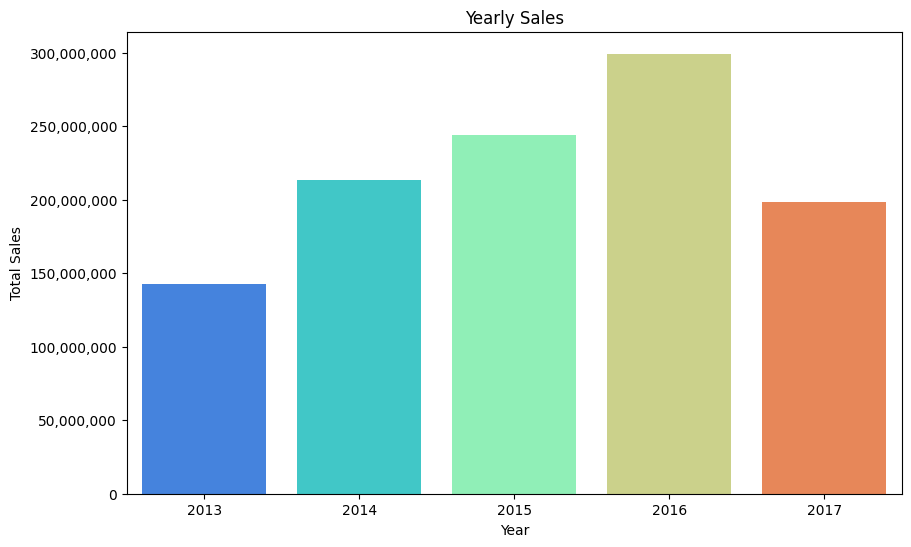

In [9]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=yearly_sales.index, y=yearly_sales.values,palette= 'rainbow')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Yearly Sales')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

In [10]:
year_ssn_sales = train_data.groupby(['year', 'season'])['sales'].sum()
year_ssn_sales.head()

year  season
2013  spring    3.566932e+07
      summer    3.592511e+07
      winter    7.089352e+07
2014  spring    4.827690e+07
      summer    6.095015e+07
Name: sales, dtype: float64

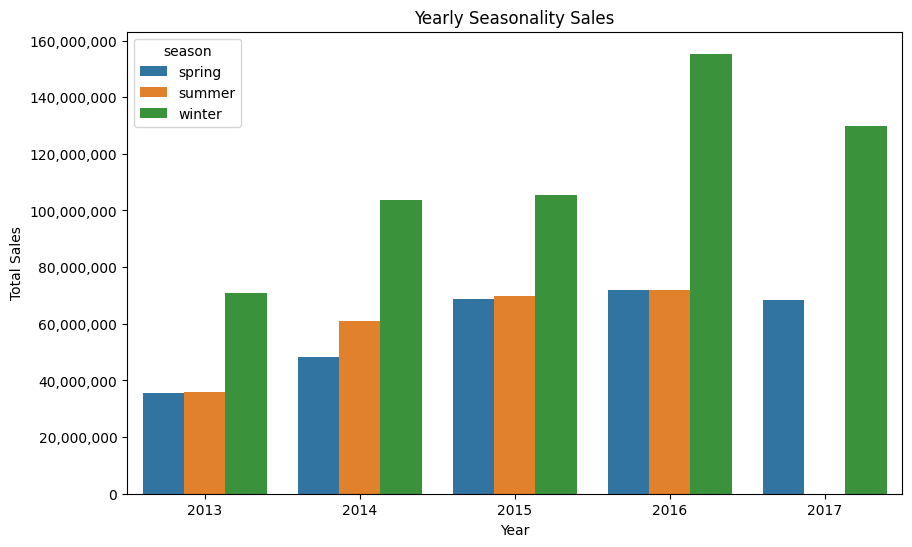

In [11]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=year_ssn_sales.index.get_level_values(0), y=year_ssn_sales.values, hue=year_ssn_sales.index.get_level_values(1))
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Yearly Seasonality Sales')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

**Interpretation**
 Here are the key observations and insights:

1. **Trend Over Years**: The graph shows the total sales for each year, with peaks and troughs indicating seasonal variations. The overall trend appears to be relatively stable, with some fluctuations.

2. **Seasonal Peaks**: The sales data is segmented into seasons: spring, summer, and winter. The graph likely shows higher sales during specific seasons, which could be due to factors like holidays, weather conditions, or marketing campaigns.

3. **Yearly Comparison**: By comparing the sales across different years, we can identify any patterns or anomalies. For instance, if 2016 shows a significant drop in sales compared to other years, it might warrant further investigation into external factors affecting that year.

4. **Data Points**: The sales figures range from 0 to 1,200, with specific data points marked for each year. The exact values for each season within a year would help in understanding the seasonal impact more precisely.

5. **Potential Insights**: If the data shows consistent peaks during a particular season each year, it could indicate a reliable seasonal trend that the business can capitalize on. Conversely, if there are unexpected dips, it might suggest issues that need addressing.



In [12]:
ssn_daytype_sales = train_data.groupby(['season', 'type'])['date'].nunique()
ssn_daytype_sales.reset_index()
ssn_daytype_sales.head()

season  type      
spring  Additional     5
        Event         14
        Holiday       44
        Transfer       3
summer  Bridge         1
Name: date, dtype: int64

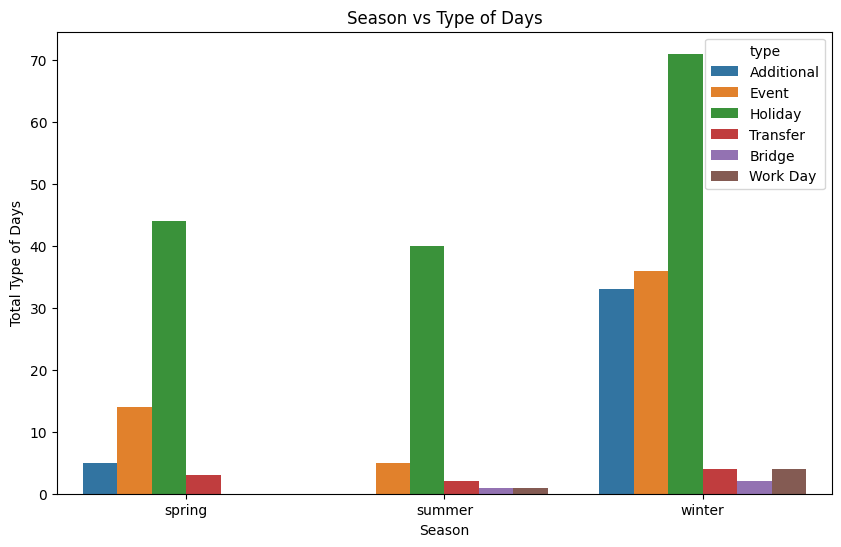

In [13]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=ssn_daytype_sales.index.get_level_values(0), y=ssn_daytype_sales.values, hue=ssn_daytype_sales.index.get_level_values(1))
plt.xlabel('Season')
plt.ylabel('Total Type of Days')
plt.title('Season vs Type of Days')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

**Interpretation**  

- Based on the visualizations, **winter has the highest number of holidays and events** compared to spring and summer.  
- **Spring has more holidays and events** than summer, but fewer than winter.  
- From the **Yearly Seasonality Sales** visualization, **sales are significantly higher in winter** compared to summer and spring.  
- This suggests that **holidays and events in winter have a direct positive impact on sales**, driving increased consumer spending.  
- On the other hand, factors like **transfer days, regular workdays, and bridge days** have a minimal impact on sales compared to holidays and major events.  

These insights highlight the importance of leveraging seasonal trends for targeted promotions and inventory management, especially during winter months when consumer spending peaks.

## **Task 2: Impact of Oil Price on Sales**  

### **Business Requirement:**  
The objective of this task is to assess the impact of oil price fluctuations on consumer spending. Understanding this relationship can help businesses anticipate changes in sales patterns and make strategic decisions accordingly.  

### **Key Analysis Areas:**  

1. **Relationship Between Oil Prices and Sales**  
   - Examine how variations in oil prices correlate with sales trends.  
   - Identify whether an increase or decrease in oil prices leads to significant shifts in consumer spending.  

2. **Regional Sensitivity to Oil Price Changes**  
   - Analyze how different regions or store locations respond to changes in oil prices.  
   - Identify whether certain areas are more affected by oil price fluctuations than others.  

The findings from this analysis will provide valuable insights into the extent to which oil prices influence retail sales and how businesses can adapt pricing, promotions, and inventory strategies accordingly. Visualizations and interpretations will follow in the upcoming sections.

<Figure size 1000x600 with 0 Axes>

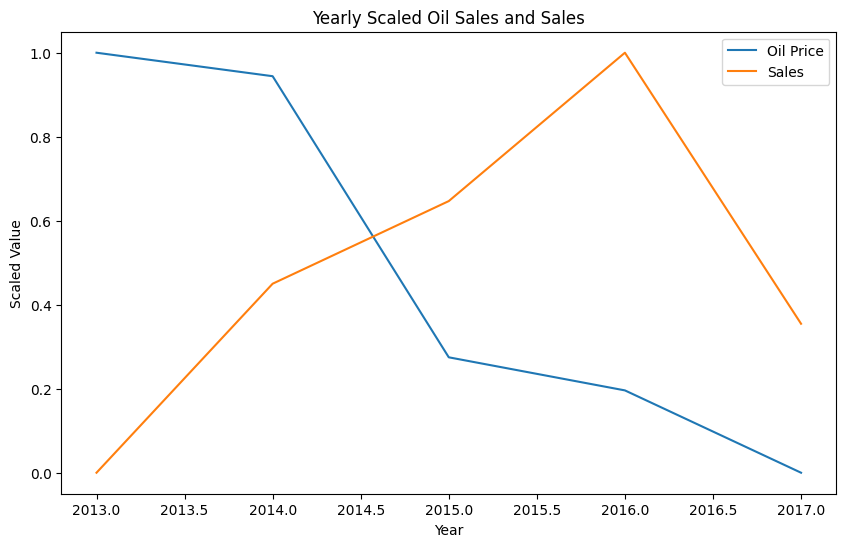

In [14]:
plt.figure(figsize=(10, 6))
scaler = MinMaxScaler()
oil_sales = train_data.groupby('year')['dcoilwtico'].sum()
oil_sales1 = train_data.groupby('year')['sales'].sum()
new_df = pd.DataFrame({'oil_sales': oil_sales, 'sales': oil_sales1})

scaler.fit(new_df)
new_df_scaled = scaler.transform(new_df)
new_df_scaled = pd.DataFrame(new_df_scaled, columns=new_df.columns, index=new_df.index)
plt.figure(figsize=(10, 6))
plt.plot(new_df_scaled.index, new_df_scaled['oil_sales'],label = 'Oil Price')
plt.plot(new_df_scaled.index, new_df_scaled['sales'],label = 'Sales')
plt.xlabel('Year')
plt.ylabel('Scaled Value')
plt.legend()
plt.title('Yearly Scaled Oil Sales and Sales')
plt.show()

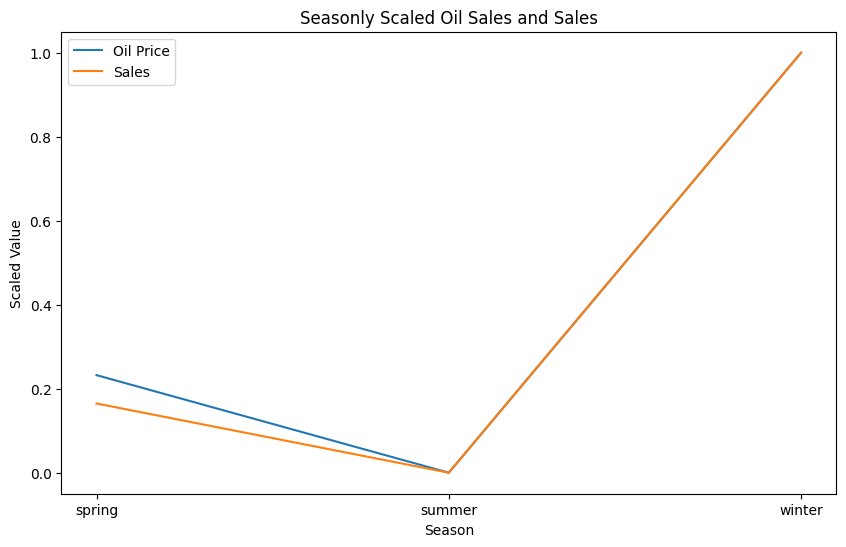

In [15]:
#here we will check the season and oil sales for that season
ssn_price = train_data.groupby('season')['dcoilwtico'].sum()
ssn_sales = train_data.groupby('season')['sales'].sum()
new_df2 = pd.DataFrame({'oil_sales': ssn_price, 'sales': ssn_sales})

scaler.fit(new_df2)
new_df_scaled2 = scaler.transform(new_df2)
new_df_scaled2 = pd.DataFrame(new_df_scaled2, columns=new_df2.columns, index=new_df2.index)
plt.figure(figsize=(10, 6))
plt.plot(new_df_scaled2.index, new_df_scaled2['oil_sales'],label = 'Oil Price')
plt.plot(new_df_scaled2.index, new_df_scaled2['sales'],label = 'Sales')
plt.xlabel('Season')
plt.ylabel('Scaled Value')
plt.legend()
plt.title('Seasonly Scaled Oil Sales and Sales')
plt.show()

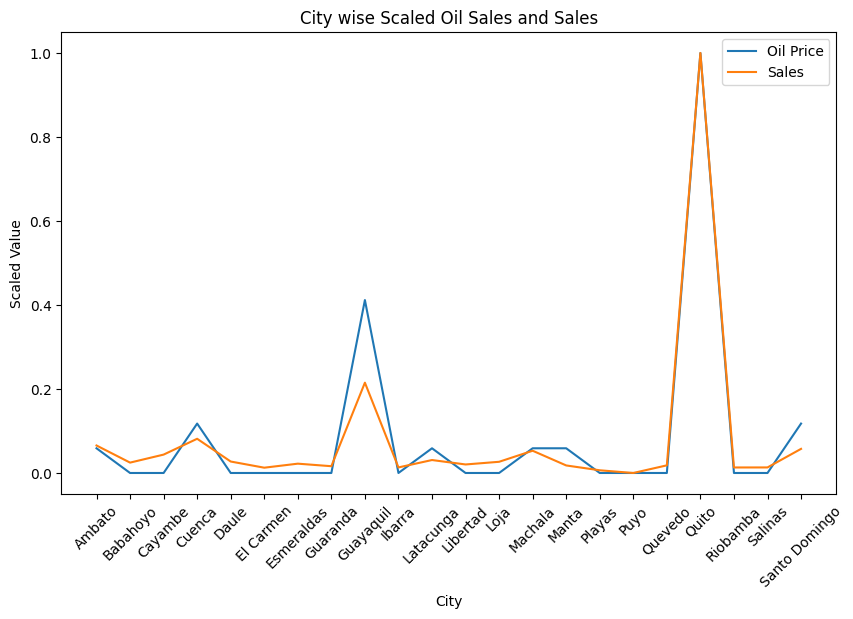

In [16]:
city_oilsales = train_data.groupby('city')['dcoilwtico'].sum()
city_sales = train_data.groupby('city')['sales'].sum()
new_df3 = pd.DataFrame({'oil_sales': city_oilsales, 'sales': city_sales})

scaler.fit(new_df3)
new_df_scaled3 = scaler.transform(new_df3)
new_df_scaled3 = pd.DataFrame(new_df_scaled3, columns=new_df3.columns, index=new_df3.index)
plt.figure(figsize=(10, 6))
plt.plot(new_df_scaled3.index, new_df_scaled3['oil_sales'],label = 'Oil Price')
plt.plot(new_df_scaled3.index, new_df_scaled3['sales'],label = 'Sales')
plt.xlabel('City')
plt.ylabel('Scaled Value')
plt.legend()
plt.xticks(rotation=45)
plt.title('City wise Scaled Oil Sales and Sales')
plt.show()

**Interpretation**  

- From the **Yearly Scaled Oil Prices and Sales** visualization, there is **no clear pattern** that directly correlates oil price fluctuations with sales trends on a yearly scale. This suggests that other factors, such as seasonality and consumer behavior, may play a more significant role in driving sales.  
- The **Seasonal Oil Prices and Sales** visualization indicates that **when oil prices peak in winter, sales also tend to peak** during the same period. However, this could be more related to seasonal demand and holiday events rather than a direct impact of oil price fluctuations.  
- The **City-wise Scaled Oil Prices and Sales** visualization reveals that there is **no significant regional impact** on sales due to oil price changes. This suggests that consumer spending patterns remain relatively stable across different locations, regardless of local oil price variations.  



## **Task 3: Store Performance Analysis**  

### **Business Requirement:**  
The objective of this task is to evaluate store performance across different locations to identify high-performing and low-performing stores. This analysis will help businesses optimize operations, allocate resources effectively, and develop location-specific strategies.  

### **Key Analysis Areas:**  

1. **Ranking Top & Bottom-Performing Stores**  
   - Identify stores with the highest and lowest sales based on total revenue.  
   - Highlight key characteristics of top-performing stores.  

2. **Sales Growth Trends per Store**  
   - Analyze individual store sales trends over time.  
   - Identify stores with consistent growth and those experiencing declines.  

3. **Comparison of Regional Store Performance**  
   - Evaluate performance variations across different regions.  
   - Determine if location plays a role in sales performance.  

By analyzing these factors, businesses can pinpoint strengths and weaknesses across store locations, helping them refine strategies for improved profitability. Visualizations and insights will be provided in the upcoming sections.

In [17]:
x_val = train_data.groupby('store_nbr')['sales'].sum().sort_values(ascending=False).index
y_val = train_data.groupby('store_nbr')['sales'].sum().sort_values(ascending=False).values

df = pd.DataFrame({'store_nbr': x_val, 'sales': y_val})
df.store_nbr = df.store_nbr.astype(str)
df.head()

,store_nbr,sales
0,44,6.335614e+07
1,45,5.568902e+07
2,47,5.202448e+07
3,3,5.153353e+07
4,49,4.434682e+07


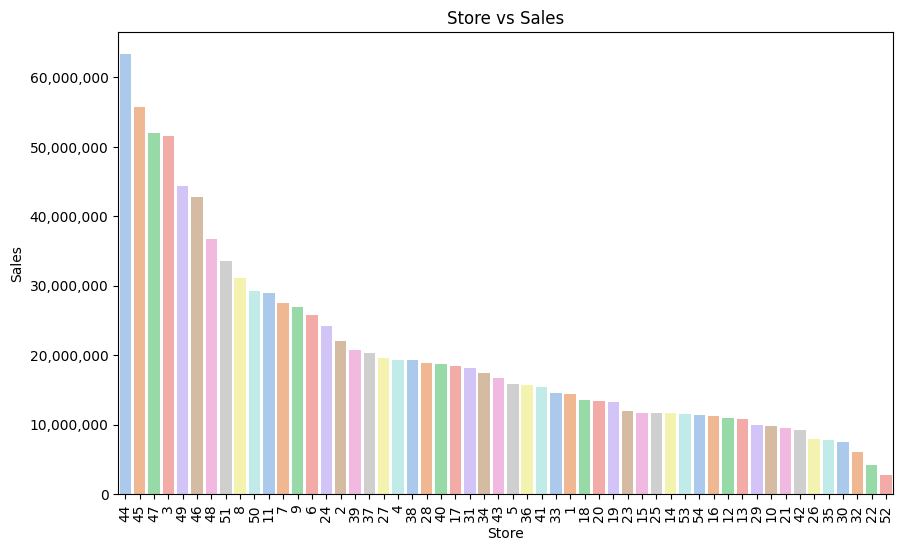

In [18]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='store_nbr', y='sales',data=df,palette='pastel')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.title('Store vs Sales')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xticks(rotation=90)
plt.show()

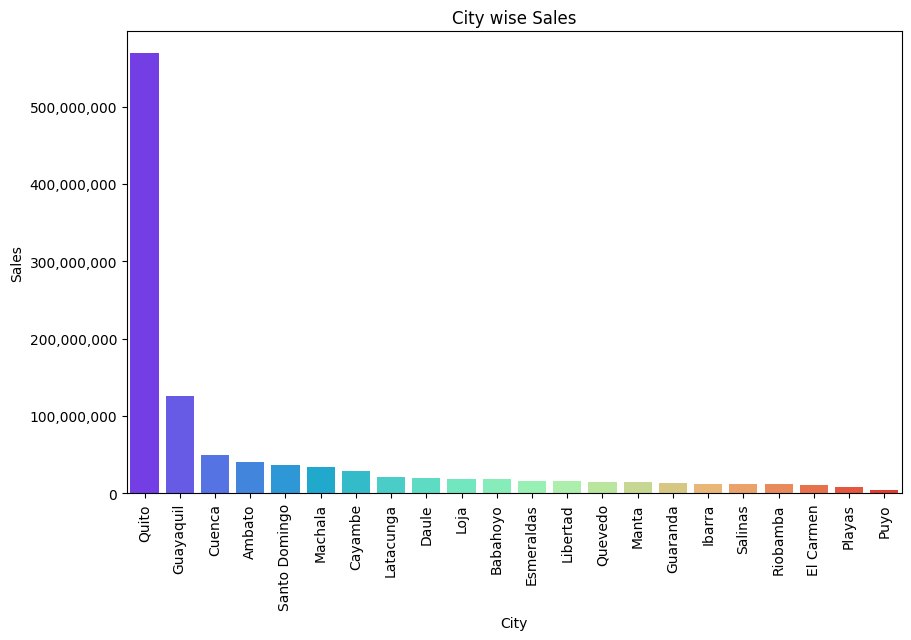

In [19]:
city_sales = train_data.groupby('city')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=city_sales.index, y=city_sales.values,palette='rainbow')
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('City wise Sales')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xticks(rotation=90)
plt.show()

In [20]:
city_stores = train_data.groupby('city')['store_nbr'].nunique().sort_values(ascending=False)
city_stores.head()

,store_nbr
city,
Quito,18
Guayaquil,8
Santo Domingo,3
Cuenca,3
Manta,2


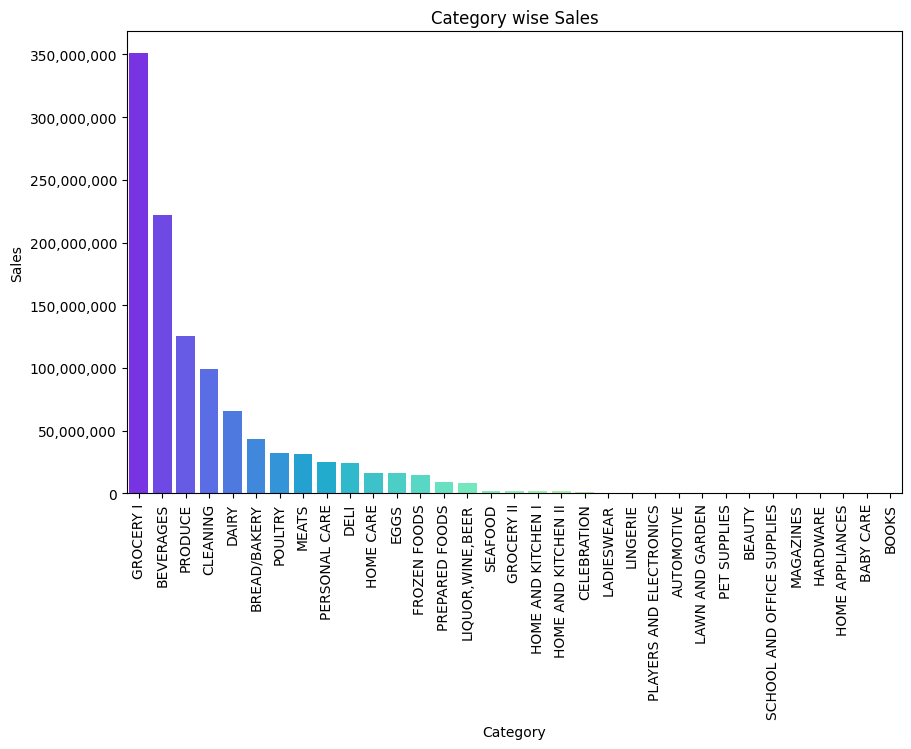

In [27]:
cat_sales = train_data.groupby('family')['sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cat_sales.index, y=cat_sales.values,palette='rainbow')

plt.xlabel('Category')
plt.ylabel('Sales')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xticks(rotation=90)
plt.title('Category wise Sales')
plt.show()

**Interpretation**  

- Based on the **City-wise Sales** visualization, the **most profitable stores are located in Quito, Guayaquil, and Cuenca**. These cities contribute significantly to overall sales.  
- The **Store vs. Sales** visualization highlights that **stores 44, 45, and 47 are the top-performing stores** in terms of revenue.  
- A **higher number of stores are concentrated in Quito and Guayaquil**, suggesting these locations are key market hubs with strong consumer demand.  
- Among different product categories, **Grocery I, Beverages, and Produce generate the highest sales**, indicating that these sections are the primary revenue drivers for retail stores.  


## **Conclusion**  

From the overall analysis, we can conclude that **winter, holidays, and special events drive significantly higher sales** compared to other seasons and regular days. Consumer spending peaks during these periods, highlighting the strong impact of seasonality on retail sales.  

### **Recommendations for Improvement:**  
- **Optimize Store Hours:** Reduce store operating hours during **spring and summer** when sales are lower to minimize labor costs and improve operational efficiency.  
- **Enhance Promotions & Offers:** Introduce **attractive discounts and promotional offers** in high-performing stores to maximize revenue during peak sales periods.  
- **Evaluate Underperforming Stores:** Consider **closing or restructuring stores** with consistently low sales to focus resources on more profitable locations.  

By implementing these improvements, businesses can **enhance profitability, reduce unnecessary expenses, and optimize store performance** based on data-driven insights.